In [1]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels,), (test_data, test_labels) = reuters.load_data(num_words=10000)

import numpy as np
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

from tensorflow.keras.utils import to_categorical # one hot encoder for lists
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [2]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 69ms/step - loss: 2.6975 - accuracy: 0.5153 - val_loss: 1.7929 - val_accuracy: 0.6320
Epoch 2/20
16/16 [==============================] - 1s 37ms/step - loss: 1.4614 - accuracy: 0.7002 - val_loss: 1.3305 - val_accuracy: 0.7120
Epoch 3/20
16/16 [==============================] - 1s 31ms/step - loss: 1.0642 - accuracy: 0.7691 - val_loss: 1.1392 - val_accuracy: 0.7470
Epoch 4/20
16/16 [==============================] - 1s 34ms/step - loss: 0.8274 - accuracy: 0.8220 - val_loss: 1.0261 - val_accuracy: 0.7910
Epoch 5/20
16/16 [==============================] - 0s 30ms/step - loss: 0.6550 - accuracy: 0.8637 - val_loss: 0.9576 - val_accuracy: 0.8090
Epoch 6/20
16/16 [==============================] - 0s 32ms/step - loss: 0.5246 - accuracy: 0.8905 - val_loss: 0.9319 - val_accuracy: 0.8120
Epoch 7/20
16/16 [==============================] - 0s 31ms/step - loss: 0.4215 - accuracy: 0.9133 - val_loss: 0.9235 - val_accuracy: 0.8040
Epoch 8/20
16

Set aside 1000 samples for the validation set, train in mini-batches of 512 for 20 epochs

In [3]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Training and validation loss and accuracy are saved in the history object. Here are the keys...

In [4]:
def plot_epochs(x, 
                    y_A, style_A, label_A, 
                    y_B, style_B, label_B, 
                    title, x_label, y_label):
    import matplotlib.pyplot as plt

    plt.clf()
    plt.plot(x, y_A, style_A, label = label_A)
    plt.plot(x, y_B, style_B, label = label_B)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()
    
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']  

The drawing code is packed inside `plot-epochs`...

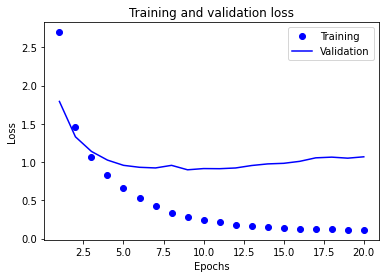

In [5]:
plot_epochs(range(1, len(loss) + 1), 
            loss, 'bo', 'Training',
            val_loss, 'b', 'Validation',
            'Training and validation loss',
            'Epochs',
            'Loss')

Training and validation loss.

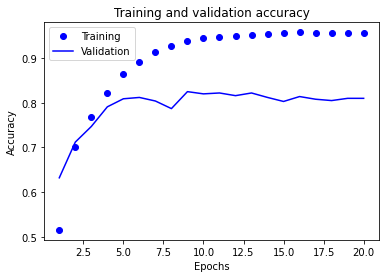

In [6]:
plot_epochs(range(1, len(loss) + 1), 
            acc, 'bo', 'Training',
            val_acc, 'b', 'Validation',
            'Training and validation accuracy',
            'Epochs',
            'Accuracy')

Training and validation accuracy.

In [7]:
print(np.argmin(val_loss), 'epochs')

8 epochs


Overfitting starts after the validation loss has hit its lowest point... 

In [8]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

history = model.fit(x_train,
                    one_hot_train_labels,
                    epochs = np.argmin(val_loss),
                    batch_size = 512)

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/8
18/18 [==============================] - 1s 24ms/step - loss: 2.5319 - accuracy: 0.5087
Epoch 2/8
18/18 [==============================] - 0s 25ms/step - loss: 1.3302 - accuracy: 0.7157
Epoch 3/8
18/18 [==============================] - 0s 26ms/step - loss: 0.9750 - accuracy: 0.7969
Epoch 4/8
18/18 [==============================] - 0s 24ms/step - loss: 0.7599 - accuracy: 0.8430
Epoch 5/8
18/18 [==============================] - 0s 24ms/step - loss: 0.6003 - accuracy: 0.8742
Epoch 6/8
18/18 [==============================] - 0s 23ms/step - loss: 0.4787 - accuracy: 0.9007
Epoch 7/8
18/18 [==============================] - 0s 23ms/step - loss: 0.3864 - accuracy: 0.9198
Epoch 8/8
71/71 [==============================] - 0s 2ms/step - loss: 0.9655 - accuracy: 0.7907


Instantiate a new network and train for the optimal number of epochs on the entire training data set.

In [9]:
results

[0.9654922485351562, 0.790739119052887]

The final training outcome.